In [1]:
%matplotlib inline
import os
from pprint import pprint
import matplotlib.pyplot as plt
import sciunit
import sciunit.scores
import neuronunit
from neuronunit.models.reduced import ReducedModel
from neuronunit.capabilities import ProducesSpikes

In [2]:
# Assumes imported neuronunit is from source, e.g. pip install -e
path = os.path.join(neuronunit.__path__[0],'models/NeuroML2/LEMS_2007One.xml')
# Instantiate three identical models
models = [ReducedModel(path, name='Izhikevich', backend='jNeuroML') for i in range(2)]

In [3]:
# Change the parameters of the second model
models[1].set_attrs({'izhikevich2007Cell':{'a':'0.04 per_ms'}})
models[1].name = 'Izhikevich_new'

pyNeuroML >>> Reloading data specified in LEMS file: /var/folders/_j/vg2m860n23d_9ty1h2z9_2880000gn/T/tmpdd4qaupo/Izhikevich.xml (/private/var/folders/_j/vg2m860n23d_9ty1h2z9_2880000gn/T/tmpdd4qaupo/Izhikevich.xml), base_dir: /var/folders/_j/vg2m860n23d_9ty1h2z9_2880000gn/T/tmpg5sx5_kt, cwd: /Users/rgerkin/Dropbox/dev/scidash/neuronunit/neuronunit/unit_test
pyNeuroML >>> Reloading data specified in LEMS file: /var/folders/_j/vg2m860n23d_9ty1h2z9_2880000gn/T/tmpyw_dbnzb/Izhikevich.xml (/private/var/folders/_j/vg2m860n23d_9ty1h2z9_2880000gn/T/tmpyw_dbnzb/Izhikevich.xml), base_dir: /var/folders/_j/vg2m860n23d_9ty1h2z9_2880000gn/T/tmpx5wv7vh3, cwd: /Users/rgerkin/Dropbox/dev/scidash/neuronunit/neuronunit/unit_test


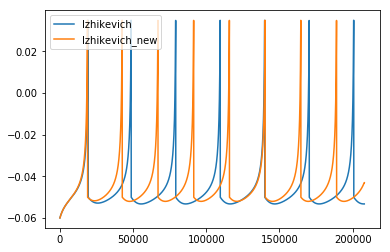

In [4]:
for model in models:
    plt.plot(model.get_membrane_potential(),label=model)
plt.legend();

In [5]:
# A new M2M test which will compare the equality of spike counts across models
class MyTest(sciunit.Test):
    required_capabilities = (ProducesSpikes,)
    score_type = sciunit.scores.ZScore
    def generate_prediction(self,model):
        count = model.get_spike_count()
        return count

In [6]:
test = MyTest(observation={'mean':8, 'std':3, 'url':'http://somewhere.thathasdata.com'})

In [7]:
s = test.judge(models)

In [8]:
# The score matrix
s

MyTest
Izhikevich      Z = -0.33
Izhikevich_new   Z = 0.00

In [9]:
x = test.json(string=False)
pprint(x)

{'description': None,
 'name': 'MyTest',
 'observation': {'mean': 8,
                 'std': 3,
                 'url': 'http://somewhere.thathasdata.com'},
 'unpicklable': [],
 'verbose': 1}


In [10]:
def check_url(x):
    if not x.json(string=False).get('url'):
        print("Model has no associated url; please set the url attribute of the model")
check_url(models[0])

Model has no associated url; please set the url attribute of the model


In [11]:
# How do you want your GitHub URLs?  
lems_url = ("https://github.com/scidash/neuronunit/blob/master/neuronunit/"
            "models/NeuroML2/LEMS_2007One.xml")
models[0].url = lems_url
models[1].url = lems_url

In [12]:
check_url(models[0])

In [13]:
# Has fewer attributes because most of them came from the LEMS file so those are assumed
# to still be the values in memory.  If we need to extract these then I need to find a
# way to read them from the file; however, there may be no general way to do so for all
# LEMS files, and certainly not for all possible models.  
x = models[0].json(string=False)
pprint(x)

{'attrs': {},
 'backend': 'jNeuroML',
 'name': 'Izhikevich',
 'run_params': {},
 'url': 'https://github.com/scidash/neuronunit/blob/master/neuronunit/models/NeuroML2/LEMS_2007One.xml'}


In [14]:
# Has more attributes because some of the original attributes from the LEMS file 
# were replaced with new ones in this session
x = models[1].json(string=False)
pprint(x)

{'attrs': {'izhikevich2007Cell': {'a': '0.04 per_ms'}},
 'backend': 'jNeuroML',
 'name': 'Izhikevich_new',
 'run_params': {},
 'url': 'https://github.com/scidash/neuronunit/blob/master/neuronunit/models/NeuroML2/LEMS_2007One.xml'}


In [15]:
# Select one score from the score matrix
score = s['Izhikevich','MyTest']
x = score.json(string=False)
pprint(x)

{'model': {'attrs': {},
           'backend': 'jNeuroML',
           'name': 'Izhikevich',
           'run_params': {},
           'url': 'https://github.com/scidash/neuronunit/blob/master/neuronunit/models/NeuroML2/LEMS_2007One.xml'},
 'observation': {'mean': 8,
                 'std': 3,
                 'url': 'http://somewhere.thathasdata.com'},
 'prediction': 7,
 'related_data': {},
 'score': -0.3333333333333333,
 'test': {'description': None,
          'name': 'MyTest',
          'observation': {'mean': 8,
                          'std': 3,
                          'url': 'http://somewhere.thathasdata.com'},
          'unpicklable': [],
          'verbose': 1},
 'unpicklable': []}


In [16]:
# Add additional properties to the JSON output
x = score.json(add_props=True,string=False)
pprint(x)

{'_class': {'name': 'ZScore', 'url': ''},
 'hash': '86f3912f4caae031c89439b496092241ab9cc3b5c9a31cf92b2621fd',
 'model': {'_class': {'name': 'ReducedModel', 'url': ''},
           'attrs': {},
           'backend': 'jNeuroML',
           'capabilities': ['Runnable',
                            'ReceivesCurrent',
                            'ReceivesSquareCurrent',
                            'ProducesActionPotentials',
                            'ProducesSpikes',
                            'ProducesMembranePotential'],
           'hash': '170984813d85b7aeb1486072856036f64b12231d1c02be0d607d46c6',
           'name': 'Izhikevich',
           'run_params': {},
           'url': 'https://github.com/scidash/neuronunit/blob/master/neuronunit/models/NeuroML2/LEMS_2007One.xml'},
 'observation': {'mean': 8,
                 'std': 3,
                 'url': 'http://somewhere.thathasdata.com'},
 'prediction': 7,
 'raw': '-0.3333',
 'related_data': {},
 'score': -0.3333333333333333,
 'score_typ

In [17]:
# Nicer formatting for the output
x = score.json(add_props=True,string=False)
pprint(x)

{'_class': {'name': 'ZScore', 'url': ''},
 'hash': '86f3912f4caae031c89439b496092241ab9cc3b5c9a31cf92b2621fd',
 'model': {'_class': {'name': 'ReducedModel', 'url': ''},
           'attrs': {},
           'backend': 'jNeuroML',
           'capabilities': ['Runnable',
                            'ReceivesCurrent',
                            'ReceivesSquareCurrent',
                            'ProducesActionPotentials',
                            'ProducesSpikes',
                            'ProducesMembranePotential'],
           'hash': '170984813d85b7aeb1486072856036f64b12231d1c02be0d607d46c6',
           'name': 'Izhikevich',
           'run_params': {},
           'url': 'https://github.com/scidash/neuronunit/blob/master/neuronunit/models/NeuroML2/LEMS_2007One.xml'},
 'observation': {'mean': 8,
                 'std': 3,
                 'url': 'http://somewhere.thathasdata.com'},
 'prediction': 7,
 'raw': '-0.3333',
 'related_data': {},
 'score': -0.3333333333333333,
 'score_typ

In [18]:
test2 = MyTest(observation={'mean':7, 'std':3.8, 'url':'http://somewhereelse.thathasdata.com'},name='Second Test')
suite = sciunit.TestSuite([test,test2],name='My Suite')
x = suite.json(add_props=True,string=False)
pprint(x)

{'_class': {'name': 'TestSuite', 'url': ''},
 'hash': 'd1b21131f165b1265b613efc27bff7908b619d888a4d3ba0208cb1ca',
 'hooks': None,
 'include_models': [],
 'name': 'My Suite',
 'skip_models': [],
 'tests': [{'_class': {'name': 'MyTest', 'url': ''},
            'description': None,
            'hash': '6ae233c642ef31eebd4da7dbc2e77a94a3431830263c1d771ac10c11',
            'name': 'MyTest',
            'observation': {'mean': 8,
                            'std': 3,
                            'url': 'http://somewhere.thathasdata.com'},
            'unpicklable': [],
            'verbose': 1},
           {'_class': {'name': 'MyTest', 'url': ''},
            'description': None,
            'hash': '9681f5d4e32d6bdf2e8ba3f3e91769b793717476b26c29e3e86f4251',
            'name': 'Second Test',
            'observation': {'mean': 7,
                            'std': 3.8,
                            'url': 'http://somewhereelse.thathasdata.com'},
            'unpicklable': [],
            'ver

In [19]:
score_matrix = suite.judge(models)

pyNeuroML >>> Reloading data specified in LEMS file: /var/folders/_j/vg2m860n23d_9ty1h2z9_2880000gn/T/tmpdd4qaupo/Izhikevich.xml (/private/var/folders/_j/vg2m860n23d_9ty1h2z9_2880000gn/T/tmpdd4qaupo/Izhikevich.xml), base_dir: /var/folders/_j/vg2m860n23d_9ty1h2z9_2880000gn/T/tmp2ktwklqj, cwd: /Users/rgerkin/Dropbox/dev/scidash/neuronunit/neuronunit/unit_test


pyNeuroML >>> Reloading data specified in LEMS file: /var/folders/_j/vg2m860n23d_9ty1h2z9_2880000gn/T/tmpyw_dbnzb/Izhikevich.xml (/private/var/folders/_j/vg2m860n23d_9ty1h2z9_2880000gn/T/tmpyw_dbnzb/Izhikevich.xml), base_dir: /var/folders/_j/vg2m860n23d_9ty1h2z9_2880000gn/T/tmpfxu73nqb, cwd: /Users/rgerkin/Dropbox/dev/scidash/neuronunit/neuronunit/unit_test


In [20]:
x = score_matrix.json(add_props=True,string=False)
pprint(x)

{'models': [{'_class': {'name': 'ReducedModel', 'url': ''},
             'attrs': {},
             'backend': 'jNeuroML',
             'capabilities': ['Runnable',
                              'ReceivesCurrent',
                              'ReceivesSquareCurrent',
                              'ProducesActionPotentials',
                              'ProducesSpikes',
                              'ProducesMembranePotential'],
             'hash': '170984813d85b7aeb1486072856036f64b12231d1c02be0d607d46c6',
             'name': 'Izhikevich',
             'run_params': {},
             'url': 'https://github.com/scidash/neuronunit/blob/master/neuronunit/models/NeuroML2/LEMS_2007One.xml'},
            {'_class': {'name': 'ReducedModel', 'url': ''},
             'attrs': {'izhikevich2007Cell': {'a': '0.04 per_ms'}},
             'backend': 'jNeuroML',
             'capabilities': ['Runnable',
                              'ReceivesCurrent',
                              'ReceivesSquareC